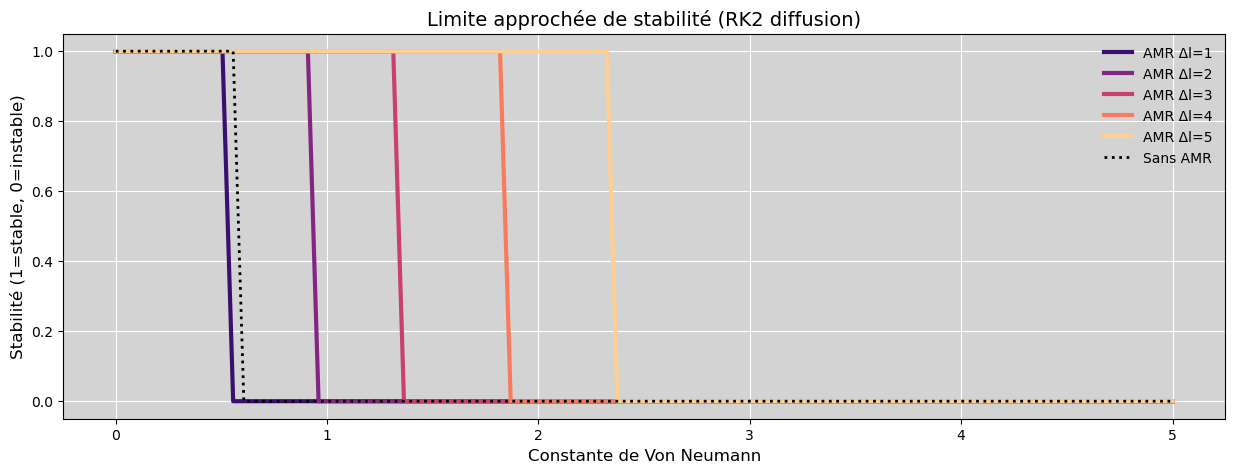

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

# Paramètres globaux
N_points   = int(1e5)
DOMAIN_SIZE = 1 
D = 1
delta_x    = DOMAIN_SIZE/N_points

def stability_criteria_RK2(MRA:bool, n, N_points, delta_x, constante_VonNeumann_diff, delta_l=0, D=1):
    """
    Retourne la valeur propre (taux de relaxation/explosion) associée au mode n.
    """
    k = 2/(delta_x**2) * (np.cos(n*np.pi/(N_points+1)) - 1)  # valeur propre Laplacien 1D
    if MRA:
        tau = (D*k
               + delta_x**2 * (
                   + 0.5  * 2**(2*delta_l) * D * constante_VonNeumann_diff * k**2
                   - 0.25 * 2**(2*delta_l) * D * delta_l * k**2
                   - 0.5  * D * constante_VonNeumann_diff * k**2 
                   + (1/12)* 2**(2*delta_l) * D * k**2 
                )
               - (1/6)  * delta_x**4 * D * constante_VonNeumann_diff**2 * k**3
               - (1/24) * delta_x**6 * D * constante_VonNeumann_diff**3 * k**4
                )
    else:
        tau = (D*k 
               - delta_x**2 * D / 12 * k**2
               - delta_x**4 * D * constante_VonNeumann_diff**2 / 6 * k**3
               + delta_x**6 * D * constante_VonNeumann_diff**3 /24 * k**4
                )
    return tau

# Paramètres balayés
modes = np.arange(1, N_points+1)
constantes_VN = np.linspace(0, 5, 100)

# Calcul des limites de stabilité
limites = {}
for dl in range(1, 6):
    bounds = []
    for cst in constantes_VN:
        taux = stability_criteria_RK2(True, modes, N_points, delta_x, cst, delta_l=dl)
        bounds.append(taux.max())
    limites[dl] = np.array(bounds)

# Calcul de la référence sans AMR
bounds_ref = []
for cst in constantes_VN:
    taux = stability_criteria_RK2(False, modes, N_points, delta_x, cst)
    bounds_ref.append(taux.max())
bounds_ref = np.array(bounds_ref)

# Tracé
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor("lightgray")
ax.grid(True, color='w')

# Référence


# Cas AMR pour delta_l = 1..5
colors = plt.cm.magma(np.linspace(0.2, 0.9, 5))
for dl, col in zip(range(1,6), colors):
    ax.plot(constantes_VN, limites[dl]<0, color=col, linewidth=3, label=f"AMR Δl={dl}")
ax.plot(constantes_VN, bounds_ref<0, color="black", linewidth=2, label="Sans AMR",linestyle = "dotted")
# Mise en forme
ax.set_xlabel("Constante de Von Neumann", fontsize=12)
ax.set_ylabel("Stabilité (1=stable, 0=instable)", fontsize=12)
ax.set_title("Limite approchée de stabilité (RK2 diffusion)", fontsize=14)
ax.legend(frameon=False)
plt.savefig('stabilite.pdf')
plt.show()
